# OLA-2 Heart Disease Project

#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset.
df = pd.read_csv("../data/raw/heart_2020_cleaned.csv")

#

## Data Visualization

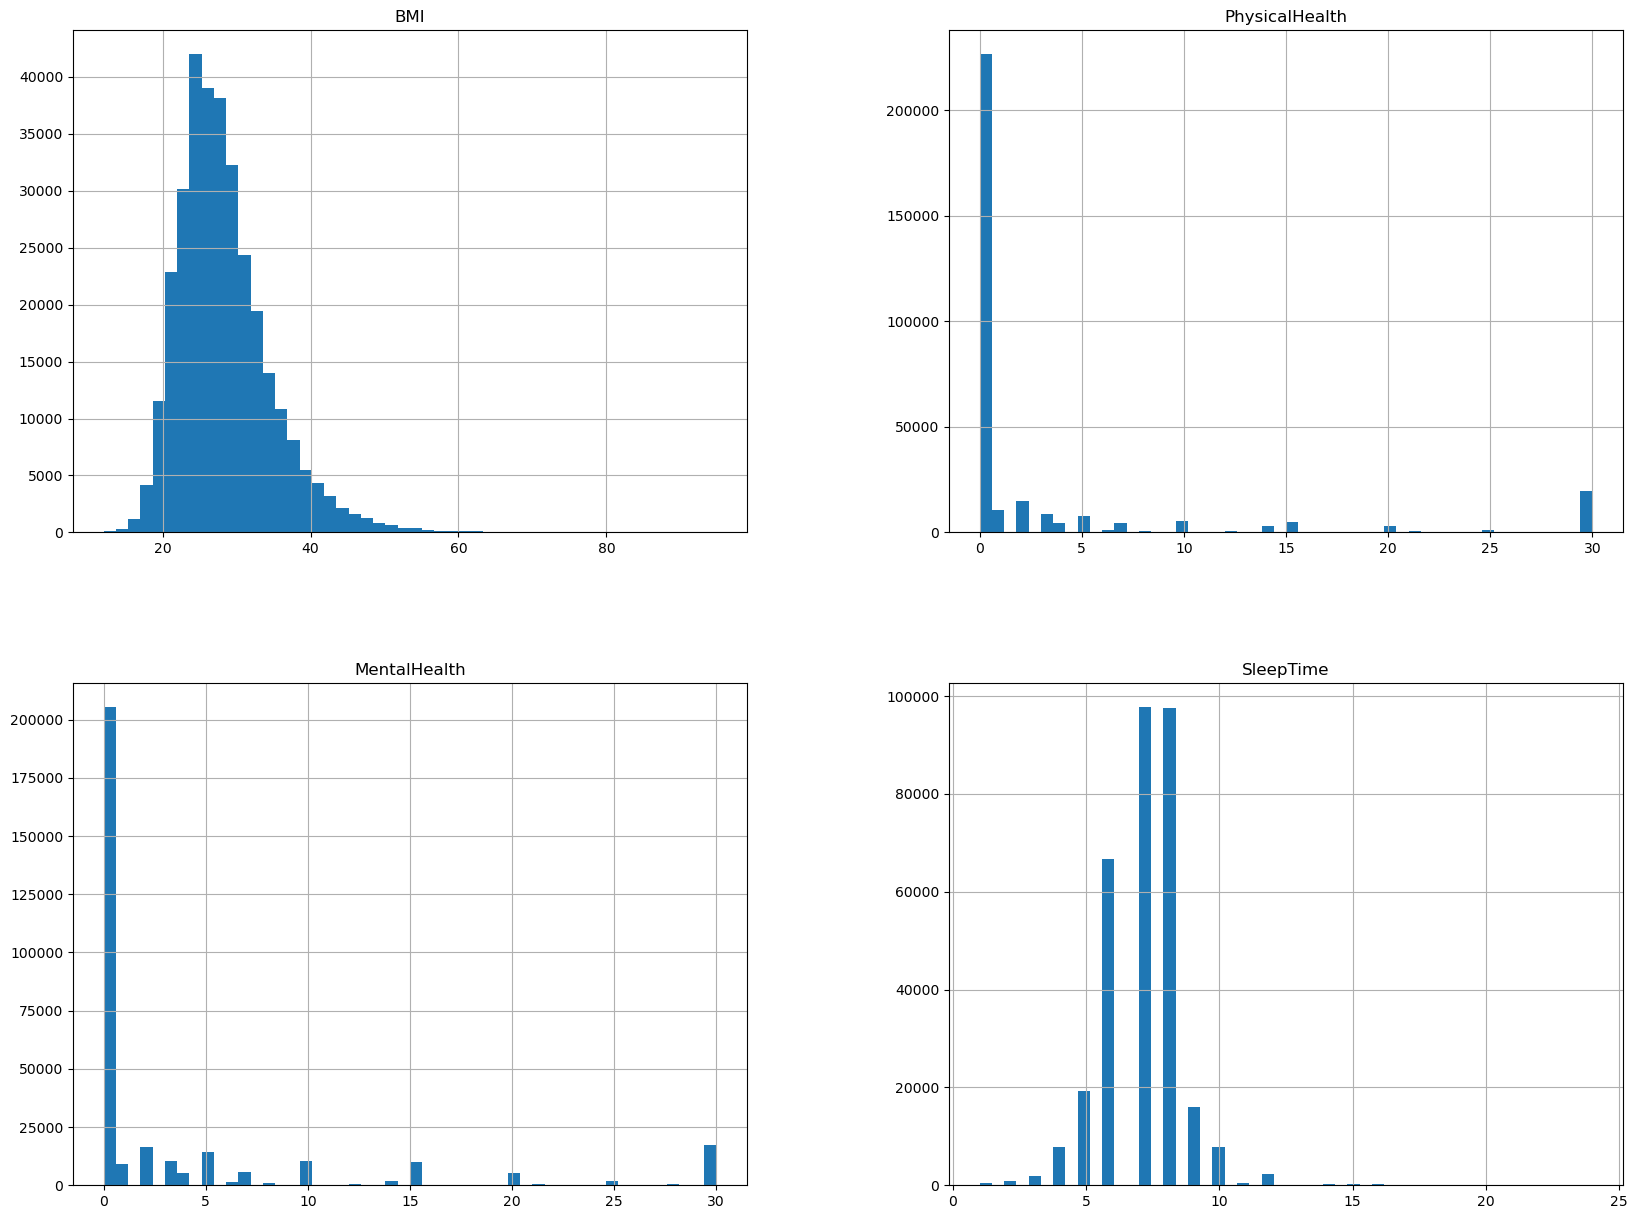

In [3]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

#

## Data Transformation

### Binary/Categorical Variables

In [4]:
# Encoding all features which include No/Yes to 0/1.

def binary_variables(df):
    """
        HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking,
        Diabetic, PhysicalActivity, Asthma, KidneyDisease, SkinCancer.
        (10)
    """
    df = df.replace({"No": 0, "Yes": 1})

    # Encoding "Sex" with 0/1.
    df["Sex"] = df["Sex"].replace({"Female": 0, "Male": 1})
    df["Sex"].value_counts()

    # Encoding "Diabetic" with 0/1, but first we replace everything with No / Yes.
    df["Diabetic"] = df["Diabetic"].replace(
        {
            "No, borderline diabetes": "No",
            "Yes (during pregnancy)": "Yes",
        }
    )
    df["Diabetic"] = df["Diabetic"].replace({"No": 0, "Yes": 1})
    
    return df

df["Diabetic"].value_counts()
df = binary_variables(df)

C:\Users\markl\AppData\Local\Temp\ipykernel_30716\4047306951.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"No": 0, "Yes": 1})
C:\Users\markl\AppData\Local\Temp\ipykernel_30716\4047306951.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"Female": 0, "Male": 1})
C:\Users\markl\AppData\Local\Temp\ipykernel_30716\4047306951.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

### Ordinal Variables

In [5]:
def ordinal_variables(df):
    # Categorizing and Encoding "AgeCategory" into 13 groups.
    age_ranges = df["AgeCategory"].unique()
    age_codes, _ = pd.factorize(age_ranges, sort=True)
    age_range_to_code = dict(zip(age_ranges, age_codes))
    df["AgeCategory"] = df["AgeCategory"].replace(age_range_to_code)
    df["AgeCategory"].value_counts().sort_index()

    # Categorizing and Encoding "BMI" into 4 different groups.
    bmi_categories = ['Underweight (< 18.5)', 'Normal weight (18.5 - 25.0)', 'Overweight (25.0 - 30.0)', 'Obese (30 <)']
    bmi_bins = [-np.inf, 18.5, 25.0, 30.0, np.inf]
    df['BMI'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_categories)

    dict_BMI = {category: code for code, category in enumerate(bmi_categories)}
    df['BMI'] = df['BMI'].map(dict_BMI)
    df["BMI"].value_counts()

    # Categorizing and Encoding "GenHealth" into 5 different groups.
    df["GenHealth"] = df["GenHealth"].replace(
        {"Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4}
    )
    
    return df
    
df["GenHealth"].value_counts()
df = ordinal_variables(df)

C:\Users\markl\AppData\Local\Temp\ipykernel_30716\3484669165.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["AgeCategory"] = df["AgeCategory"].replace(age_range_to_code)
C:\Users\markl\AppData\Local\Temp\ipykernel_30716\3484669165.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["GenHealth"] = df["GenHealth"].replace(


### Nominal Variables

In [6]:
def nominal_variables(df):
    # One-hot Encoding "Race" into 6 groups.
    """White, Hispanic, Black, Other, Asian, American Indian/Alskan Native."""

    df = pd.get_dummies(df, columns=["Race"])

    return df

df = nominal_variables(df)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,0,1,0,0,3.0,30.0,0,0,7,...,5.0,1,0,1,False,False,False,False,False,True
1,0,1,0,0,1,0.0,0.0,0,0,12,...,7.0,0,0,0,False,False,False,False,False,True
2,0,2,1,0,0,20.0,30.0,0,1,9,...,8.0,1,0,0,False,False,False,False,False,True
3,0,1,0,0,0,0.0,0.0,0,0,11,...,6.0,0,0,1,False,False,False,False,False,True
4,0,1,0,0,0,28.0,0.0,1,0,4,...,8.0,0,0,0,False,False,False,False,False,True


#

In [ ]:
# Saving the DataFrame to a CSV file
df.to_csv("../data/raw/heart_2020_cleaned_transformed.csv", index=False)

## Data Preparation

In [7]:
# Define features and target.
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Splitting the dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Feature Scaling
* Removes Bias: Different features can have different scales 
    (e.g., age might range from 0 to 100, while income might range from thousands to millions). 
* Without standardization, features with larger scales can dominate the model's decision-making process.
    Improves Performance: Many machine learning algorithms, including SVM, 
    perform better when features are on a relatively similar scale.
* Assists in Comparison: Standardization makes the features more comparable and removes the units, 
    so you're not comparing apples and oranges.

In [8]:
# Standardizing the features (data preprocessing/feature scaling).

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#

#

## Handling Imbalancing - Resampling Techniques

In [9]:
from sklearn.base import clone

### Stratified Sampling

In [10]:
from sklearn.model_selection import StratifiedKFold

def perform_stratified_cv(model, X, y, n_splits=3, sample_frac=1.0):
    """
    Perform stratified k-fold cross-validation on a fraction of the given model's dataset.

    Args:
    model: The machine learning model to evaluate.
    X: Feature set.
    y: Target variable.
    n_splits: Number of folds for cross-validation (default is 5).
    sample_frac: Fraction of the dataset to use for each fold (default is 0.2).

    Returns:
    A plot of class distribution in each fold and prints classification reports.
    """
    
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    
    for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Using a fraction of the dataset if sample_frac is less than 1.0
        if sample_frac < 1.0:
            X_train_sample, _, y_train_sample, _ = train_test_split(
                X_train_fold, y_train_fold, test_size=1-sample_frac, random_state=42)
        else:
            X_train_sample, y_train_sample = X_train_fold, y_train_fold

        train_counts = y_train_sample.value_counts(normalize=True)
        test_counts = y_test_fold.value_counts(normalize=True)
        
        # axes[i].bar(train_counts.index + 0.00, train_counts.values, color='blue', width=0.25, label='Train Sample')
        # axes[i].bar(test_counts.index + 0.25, test_counts.values, color='red', width=0.25, label='Test')
        # axes[i].set_title(f'Stratified Fold {i+1}')
        # axes[i].set_xticks([0, 1])
        # axes[i].set_xticklabels(['No Heart Disease', 'Heart Disease'])
        # axes[i].legend()

        model_clone = clone(model)
        model_clone.fit(X_train_sample, y_train_sample)
        y_pred = model_clone.predict(X_test_fold)

        print(f"\nClassification Report for Fold {i+1}:\n")
        print(classification_report(y_test_fold, y_pred))


#

### Random Oversampling

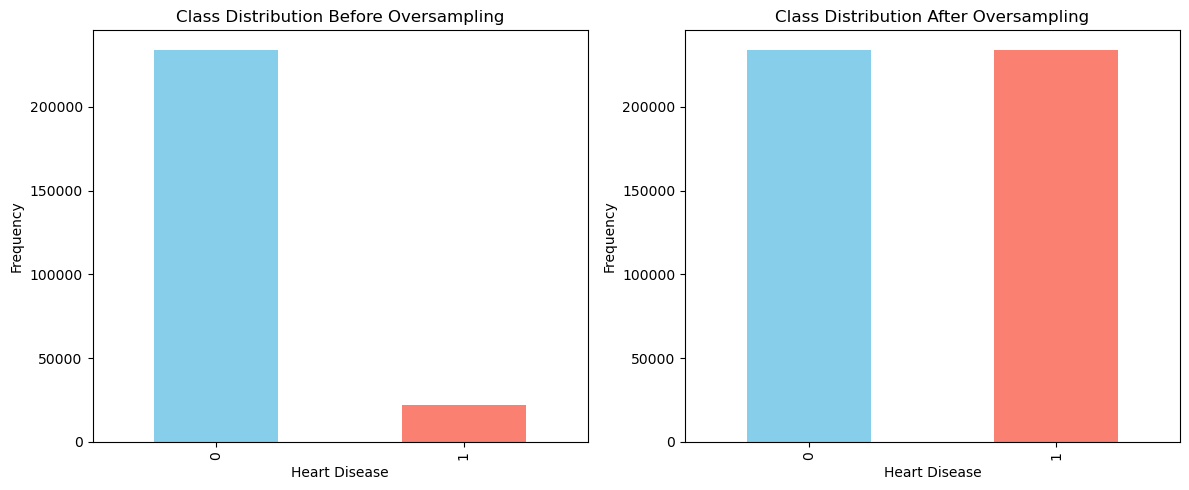

In [11]:
from imblearn.over_sampling import RandomOverSampler

def perform_random_oversampling(model, random_state=42):
    """
    Args:
    model: The machine learning model to be trained.
    random_state: Random state for reproducibility.

    Returns:
    Trained model and prints the classification report.
    """
    
    # Random Oversampling
    rd_oversampler = RandomOverSampler(random_state=random_state)
    X_train_oversampled, y_train_oversampled = rd_oversampler.fit_resample(X_train, y_train)

    # Train the model
    model_clone = clone(model)
    model_clone.fit(X_train_oversampled, y_train_oversampled)
    
    # Evaluate the model
    y_pred = model_clone.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    return model_clone

# Random Oversampling
rd_oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = rd_oversampler.fit_resample(X_train, y_train)
    
# Plotting the class distribution BEFORE oversampling
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Class Distribution Before Oversampling")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")

# Plotting the class distribution AFTER oversampling
plt.subplot(1, 2, 2)
pd.Series(y_train_oversampled).value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Class Distribution After Oversampling")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#

### SMOTE Oversampling

> SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address the class imbalance problem in machine learning.
It generates synthetic samples of the minority class by interpolating between existing minority class samples.
This helps to balance the class distribution and improve the performance of machine learning models.
In this code, SMOTE is used to oversample the minority class in the training data (X_train, y_train).
The SMOTE algorithm is applied to create synthetic samples, increasing the number of minority class instances.
This helps to mitigate the impact of class imbalance and improve the accuracy of the logistic regression model.

In [12]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)
# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [13]:
from imblearn.over_sampling import SMOTE

def perform_smote_oversampling(model, random_state=42):
    """
    Perform SMOTE oversampling on the dataset and train the provided model.

    Args:
    model: The machine learning model to be trained.
    random_state: Random state for reproducibility.

    Returns:
    Trained model and prints the classification report.
    """
    
    # SMOTE Oversampling
    smote = SMOTE(random_state=random_state)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the model
    model_clone = clone(model)
    model_clone.fit(X_train_smote, y_train_smote)
    
    # Evaluate the model
    y_pred = model_clone.predict(X_test)
    print(classification_report(y_test, y_pred))


#

## Modeling

### Logistic Regression 

`(Without resampling)`

In [14]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression
log_reg_model = LogisticRegression()

In [15]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Evaluate the model
y_pred = log_reg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959



In [17]:
# Calculate the predicted probabilities
y_scores = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

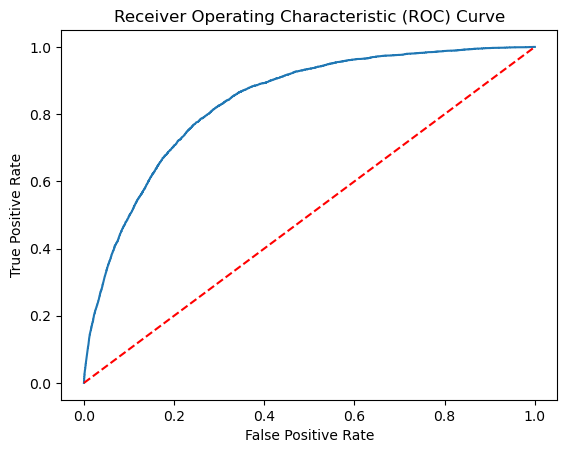

In [18]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot(
    [0, 1], [0, 1], linestyle="--", color="r"
)  # Add the dotted line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()


#### 1. Stratified Sampling

In [19]:
perform_stratified_cv(log_reg_model, X, y)

c:\Users\markl\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     97474
           1       0.52      0.11      0.18      9125

    accuracy                           0.92    106599
   macro avg       0.72      0.55      0.57    106599
weighted avg       0.89      0.92      0.89    106599



c:\Users\markl\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     97474
           1       0.56      0.11      0.19      9124

    accuracy                           0.92    106598
   macro avg       0.74      0.55      0.57    106598
weighted avg       0.89      0.92      0.89    106598


Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     97474
           1       0.52      0.11      0.18      9124

    accuracy                           0.92    106598
   macro avg       0.72      0.55      0.57    106598
weighted avg       0.89      0.92      0.89    106598



c:\Users\markl\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 2. Random Oversampling

In [20]:
log_regressor = perform_random_oversampling(log_reg_model)

# Assume X_test is your test data
proba = log_regressor.predict_proba(X_test)

# The probability of the positive class (class 1)
proba_positive_class = proba[:, 1]

# To convert probabilities to percentages
percentage = proba_positive_class * 100

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58367
           1       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



#### 3. SMOTE Oversampling

In [21]:
perform_smote_oversampling(log_reg_model)

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     58367
           1       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



#

### Support Vector Machine

In [22]:
from sklearn.svm import SVC



# Sampling since SMV takes a long time to evaluate when the dataset is large:
# 10% Used to test this.
df = df.sample(frac=0.1, random_state=42)

# Define features and target.
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Splitting the dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(random_state=42, class_weight="balanced")   # set to balanced
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [23]:
y_pred = svm_model.predict(X_test)

In [24]:
classification_report_output = classification_report(y_test, y_pred)
print(classification_report_output)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      5806
           1       0.24      0.78      0.37       590

    accuracy                           0.76      6396
   macro avg       0.61      0.77      0.61      6396
weighted avg       0.90      0.76      0.81      6396



### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier with class_weight='balanced'
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5806
           1       0.29      0.13      0.18       590

    accuracy                           0.89      6396
   macro avg       0.60      0.55      0.56      6396
weighted avg       0.86      0.89      0.87      6396



#### 1. Stratified Sampling

In [26]:
perform_stratified_cv(rf_classifier, X, y)


Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9704
           1       0.21      0.09      0.13       956

    accuracy                           0.89     10660
   macro avg       0.56      0.53      0.54     10660
weighted avg       0.85      0.89      0.87     10660


Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9704
           1       0.22      0.08      0.12       956

    accuracy                           0.89     10660
   macro avg       0.57      0.53      0.53     10660
weighted avg       0.85      0.89      0.87     10660


Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9704
           1       0.29      0.12      0.17       956

    accuracy                           0.89     10660
   macro avg       0

#### 2. Random Oversampling

In [27]:
perform_random_oversampling(rf_classifier)


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5806
           1       0.30      0.26      0.28       590

    accuracy                           0.87      6396
   macro avg       0.61      0.60      0.60      6396
weighted avg       0.87      0.87      0.87      6396



RandomForestClassifier(class_weight='balanced', random_state=42)

#### 3. SMOTE Oversampling

In [28]:
perform_smote_oversampling(rf_classifier)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5806
           1       0.38      0.20      0.26       590

    accuracy                           0.90      6396
   macro avg       0.65      0.58      0.60      6396
weighted avg       0.87      0.90      0.88      6396



#

## Results

> This is the overview of our results from the models. We use the results from `category 1 / Yes`, to determine the chance of a heart disease.

In [29]:
data_table = {
    "Model": [
        "Logistic Regression (Without Resampling)", "Logistic Regression (Stratified)",
        "Logistic Regression (Random Oversampling)","Logistic Regression (SMOTE)", 
        "Random Forest (Without Resampling)", "Random Forest (Stratified)", 
        "Random Forest (Random Oversampling)", "Random Forest (SMOTE)", 
        "SVM (Without Resampling - 10%)", "SVM (Stratified)", 
        "SVM (Random Oversampling)", "SVM (SMOTE)", 
    ],
    "Precision": [
        0.53, 0.56, 
        0.23, 0.23, 
        0.22, 0.22,
        0.23, 0.27,
        0.24, "-",
        "-", "-",
    ],
    "Recall": [
        0.10, 0.11, 
        0.78, 0.78, 
        0.20, 0.20,
        0.31, 0.25,
        0.78, "-",
        "-", "-",
    ],
    "F1-score": [
        0.17, 0.19, 
        0.35, 0.35, 
        0.21, 0.21,
        0.26, 0.26,
        0.37, "-",
        "-", "-",
    ]
}

# Create the DataFrame
classification_reports_df = pd.DataFrame(data_table)
classification_reports_df.reset_index(drop=True)

classification_reports_df

,Model,Precision,Recall,F1-score
0,Logistic Regression (Without Resampling),0.53,0.1,0.17
1,Logistic Regression (Stratified),0.56,0.11,0.19
2,Logistic Regression (Random Oversampling),0.23,0.78,0.35
3,Logistic Regression (SMOTE),0.23,0.78,0.35
4,Random Forest (Without Resampling),0.22,0.2,0.21
5,Random Forest (Stratified),0.22,0.2,0.21
6,Random Forest (Random Oversampling),0.23,0.31,0.26
7,Random Forest (SMOTE),0.27,0.25,0.26
8,SVM (Without Resampling - 10%),0.24,0.78,0.37
9,SVM (Stratified),-,-,-


* We can determine that the Logistic Regression Model would be the preferred choice to predict the chance of heart disease.
* Even though SVM has the highest F1-score, it only uses 10% of the dataset, since we concluded it was exceptionally slow.

#

### Exporting the code out of the notebook into an application

In [30]:
import pickle

In [31]:
data = {"model": log_regressor}
with open("../data/processed/heart_disease_predictor.pkl", "wb") as file:
    pickle.dump(data, file)

In [32]:
with open("../data/processed/heart_disease_predictor.pkl", "rb") as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]

print(data_table)

{'Model': ['Logistic Regression (Without Resampling)', 'Logistic Regression (Stratified)', 'Logistic Regression (Random Oversampling)', 'Logistic Regression (SMOTE)', 'Random Forest (Without Resampling)', 'Random Forest (Stratified)', 'Random Forest (Random Oversampling)', 'Random Forest (SMOTE)', 'SVM (Without Resampling - 10%)', 'SVM (Stratified)', 'SVM (Random Oversampling)', 'SVM (SMOTE)'], 'Precision': [0.53, 0.56, 0.23, 0.23, 0.22, 0.22, 0.23, 0.27, 0.24, '-', '-', '-'], 'Recall': [0.1, 0.11, 0.78, 0.78, 0.2, 0.2, 0.31, 0.25, 0.78, '-', '-', '-'], 'F1-score': [0.17, 0.19, 0.35, 0.35, 0.21, 0.21, 0.26, 0.26, 0.37, '-', '-', '-']}
